In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded0 = files.upload()

Saving sign_mnist_train.csv to sign_mnist_train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv


In [ ]:
import pathlib
import io

X_train = pd.read_csv(io.BytesIO(uploaded0['sign_mnist_train.csv']))
X_test = pd.read_csv(io.BytesIO(uploaded['sign_mnist_test.csv']))


#Extracting the labels from the data
y_train = X_train["label"]
y_test = X_test["label"]

#Dropping the labels from the X_train and X_test dataframe
X_train.drop(columns = ["label"], inplace = True)
X_test.drop(columns = ["label"], inplace = True)

#Checking the shapes of the dataframes
X_train.shape, X_test.shape, y_train.shape, y_test.shape
characters= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
#Reshaping the data from (m,784) to (m,28,28)
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, input_shape=[28, 28, 1]),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding="SAME"),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding="SAME"),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding="SAME"),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(25)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
858/858 [==============================] - 37s 42ms/step - loss: 1.5506 - accuracy: 0.5245
Epoch 2/3
858/858 [==============================] - 37s 43ms/step - loss: 0.0350 - accuracy: 0.9911
Epoch 3/3
858/858 [==============================] - 37s 43ms/step - loss: 0.0038 - accuracy: 0.9997


In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

225/225 - 3s - loss: 0.3246 - accuracy: 0.9267

Test accuracy: 0.9266592264175415


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(X_test)

In [ ]:
predictions[437]

array([6.85332168e-07, 2.28595473e-14, 2.33495845e-09, 4.06531142e-10,
       4.79787786e-07, 5.70379334e-12, 1.30253468e-07, 2.05301900e-12,
       1.22170163e-10, 7.10247157e-26, 1.31654475e-14, 7.61914739e-17,
       1.90149515e-03, 1.18290354e-03, 3.06026038e-07, 3.86929854e-13,
       2.15859587e-11, 7.87281075e-14, 9.96913910e-01, 1.88647939e-13,
       7.59611270e-15, 5.17292815e-16, 4.19768467e-19, 1.56055557e-09,
       1.08778580e-14], dtype=float32)

In [ ]:
print(characters[np.argmax(predictions[437])])

S


In [ ]:
print(characters[y_test[437]])

S


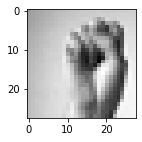

In [ ]:
plt.figure(figsize = (2,2))
plt.imshow(X_test[437].reshape(28, 28) , cmap = "gray");